# What are the factors that contribute the most to a victory in League of Legends?

## Source: https://www.kaggle.com/datasets/jakubkrasuski/league-of-legends-ranked-match-data-season-15

# What is League of Legends?

#### League of Legends is a 5v5 team-based Multiplayer Online Battle Arena (MOBA) game. Every player selects a different champion, each with unique abilities, and the win condition is to destroy the enemy Nexus, before they destroy yours.

# Important Vocabulary to know:

## The map
--------
### **Nexus**:
The nexus is the structure that must be destroyed in order to win the match

### **Inhibitor**:
Three inhibitors protect the Nexus and in order to access the Nexus Turrets and Nexus, at least one must be destroyed. They can respawn after a set amount of time.

### **Turret**:
Turrets are defensive structures that attack enemy minions and champions. They must be destroyed in order to damage the enemy Nexus.

### **Lane**:
The map is divided into the top, middle, and bottom lanes. The top laner resides in the top lane, the mid laner resides in the middle lane, and the ADC (attack damage carry role) and the support reside in the bottom lane.

### **Jungle**:
The jungler role resides in the jungle, where neutral monsters are located. It is the jungler's job to secure objectives.

### **Objectives**:
Objectives in this dataset are split between dragons, barons, and rift herald. All of these benefit the team in one way or another, and while they are not necessary, are very helpful.

## Personal player stats
--------
### **KDA**:
The KDA ratio is calculated by the kills, deaths, and assists a player has. Higher KDA ratios are considered better than lower ones.

### **Gold**:
Gold is the currency used in-game to purchase items, which grant stat bonuses as well as give additional effects to your champion. Gold can be gained from killing minions and enemy champions.

### **Vision**:
The game uses a Fog of War mechanic that restrict vision, which is used to see enemy champions on the map. By placing down a ward, you now have vision over that area and it is difficult for enemies to sneak up on you since you can now see that area.

## Mastery
--------
### **Mastery Level**:
Players have different mastery levels on every champion, and it tracks the dedication one has to the champion.

### **Mastery points**:
Mastery points are connected to mastery level and also track the progress a player has on different champions.

## This is the layout of the map.
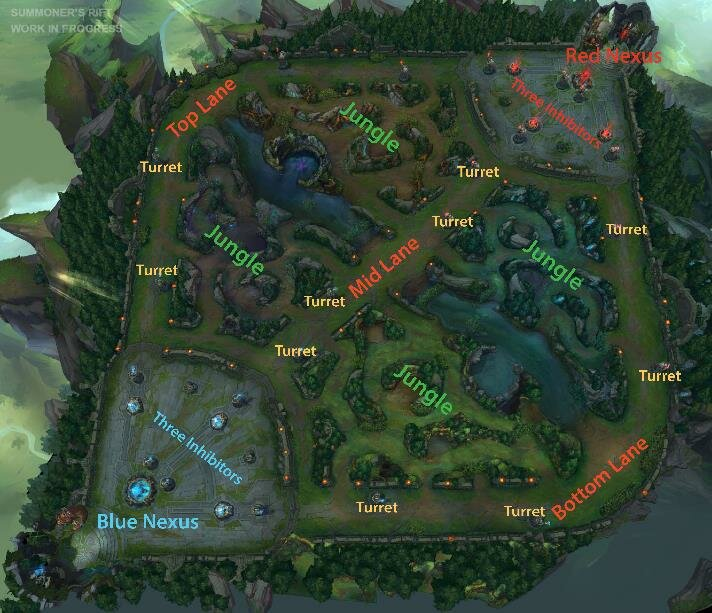

Below I have separated the variables into numerical and categorical. The target variable, "wins", is a boolean.

I have highlighted the different attributes I would like to explore in determining what correlates with victory. Yellow highlight means that it has to deal with players' in-game stats, green means the amount of experience a player has with their selected champion, and pink is what the team has accomplished together.

In [1]:
#@title Numerical Variables
from IPython.display import display, HTML

html_content = """

<p>Game ID (numeric identifier for the match)</p>

<p>Start UTC (the match start time in UTC)</p>

<p>Duration (the total match duration)</p>

<p>Map ID (the map type: 11 for all rows)</p>

<p>Participant ID (numeric ID of the participant in the match, every game ID has the participants valued 1 through 10, depending on role and team)</p>

<p>Champion ID (numeric ID of the champion the participant is playing as)</p>

<p><span style="background-color: yellow;">Kills (number of kills the participant has)</span></p>

<p><span style="background-color: yellow;">Deaths (number of deaths the participant has)</span></p>

<p><span style="background-color: yellow;">Assists (number of assists the participant has)</span></p>

<p><span style="background-color: yellow;">KDA Ratio (Kill/Death/Assist ratio)</span></p>

<p><span style="background-color: yellow;">Kill participation (the participant's contribution to team kills)</span></p>

<p><span style="background-color: yellow;">Gold earned (total gold earned by participant)</span></p>

<p><span style="background-color: yellow;">Gold spent (total gold spent by participant)</span></p>

<p><span style="background-color: yellow;">Gold per minute (gold earned per minute)</span></p>

<p><span style="background-color: yellow;">Damage dealt (total damage dealt by participant to all sources)</span></p>

<p><span style="background-color: yellow;">Damage per minute (damage dealt per minute)</span></p>

<p><span style="background-color: yellow;">Damage to champ (total damage dealt specifically to champions)</span></p>

<p><span style="background-color: yellow;">Damage to champs per minute (damage to champions per minute)</span></p>

<p>Damage taken (total damage taken by the participant)</p>

<p><span style="background-color: yellow;">Vision score (vision score reflecting wards and vision control)</span></p>

<p>Solo LP (league points earned by participant in ranked solo)</p>

<p>Solo wins (number of wins in ranked solo)</p>

<p>Solo losses (number of losses in ranked solo)</p>

<p>Flex LP (league points earned in flex)</p>

<p>Flex Wins (number of wins in ranked flex)</p>

<p>Flex losses (number of losses in ranked flex)</p>

<p><span style="background-color: lightgreen;">Mastery level (champion mastery level for the champion the participant is playing)</span></p>

<p>Mastery points (total mastery points for that champion)</p>

<p>Mastery last played (timestamp of when the champion was last played in seconds)</p>

<p>Mastery points since last level (mastery points accumulated since last level)</p>

<p>Mastery points until next level (mastery points needed for the next level)</p>

<p>Mastery tokens (number of mastery tokens earned)</p>

<p><span style="background-color: pink;">Team baron kills (total baron kills by the team)</span></p>

<p><span style="background-color: pink;">Team dragon kills (total dragon kills by the team)</span></p>

<p><span style="background-color: pink;">Team tower kills (total towers destroyed by the team)</span></p>

<p><span style="background-color: pink;">Team champion kills (total champion kills by the team)</span></p>

<p><span style="background-color: pink;">Team rift herald kills (number of rift herald kills by the team)</span></p>

<p><span style="background-color: pink;">Team inhibitor kills (number of inhibitors destroyed by the team)</span></p>

<hr>

<h3>Final ingame personal attributes:</h3>

<p>Final ability haste</p>

<p>Final ability power</p>

<p>Final armor</p>

<p>Final attack damage</p>

<p>Final attack speed</p>

<p>Final movement speed</p>

<p>Final maximum health</p>

<p>Final lifesteal</p>

<p>Final omnivamp</p>

<p>Final power max</p>

<p>Final spellvamp</p>
"""

display(HTML(html_content))


In [2]:
#@title Categorical Variables
html_content = """

<p>Queue (the queue type: ranked solo/duo for all rows)</p>

<p>Platform ID (region: EUN1/EUW1)</p>

<p>Game Mode (CLASSIC for all rows)</p>

<p>Game Version (patch version)</p>

<p>Champion Name (name of the champion the participant is playing as)</p>

<p>Position (the role a player is playing as)</p>

<p>Item 0 (name of participant's first item)</p>

<p>Item 1 (name of participant's second item)</p>

<p>Item 2 (name of participant's third item)</p>

<p>Item 3 (name of participant's fourth item)</p>

<p>Item 4 (name of participant's fifth item)</p>

<p>Item 5 (name of participant's sixth item)</p>

<p>Item 6 (name of the trinket or extra item)</p>

<p>Solo tier (rank tier of each participant in ranked solo)</p>

<p>Solo rank (division in ranked solo)</p>

<p>Flex tier (rank tier of each participant in ranked flex)</p>

<p>Flex rank (division in ranked flex)</p>
"""

display(HTML(html_content))


In [3]:
#@title Boolean Variables
html_content = """

<p><span style="background-color: #ADD8E6;">Win (boolean that indicates if the participant's team has won or lost)</span></p>
"""

display(HTML(html_content))

## Loading the data

In [4]:
import pandas as pd
from packaging import version
import sklearn
from pathlib import Path
import tarfile
import urllib.request

In [5]:
from google.colab import files
import kagglehub
import os

path = kagglehub.dataset_download("jakubkrasuski/league-of-legends-ranked-match-data-season-15")

filename = "League of Legends Ranked Match Data  Season 15 (EUN).csv"
csv_path = os.path.join(path, filename)


100%|██████████| 8.53M/8.53M [00:00<00:00, 82.7MB/s]

Extracting files...


In [6]:
dataset = pd.read_csv(csv_path)

## Dropping the null and unused columns

These are columns that I believe are irrelevant for this specific project, or that are redudant. For example, mastery tokens or points aren't needed when mastery level perfectly encapsulates the same information but more succinctly. Player rank and their losses/wins are also outer game influences that are not needed for these purposes.

In [7]:
missing_values = dataset.isnull().sum()
print('Missing values per column:')
print(missing_values[missing_values > 0])

Missing values per column:
solo_tier      674
solo_rank      674
flex_tier    40595
flex_rank    40595
dtype: int64


In [8]:
dataset = dataset.drop(columns=['final_spellVamp','final_powerMax', 'final_omnivamp', 'final_lifesteal', 'final_healthMax', 'final_movementSpeed',
                                'final_attackSpeed', 'final_attackDamage', 'final_armor', 'final_abilityPower', 'final_abilityHaste', 'final_power', 'final_health'])

dataset = dataset.drop(columns=['flex_losses', 'flex_wins', 'flex_lp', 'flex_rank', 'flex_tier', 'solo_losses', 'solo_wins', 'solo_lp', 'solo_rank', 'solo_tier',
                                'mastery_pointsSinceLastLevel', 'mastery_pointsUntilNextLevel','mastery_points', 'mastery_tokens'])

dataset = dataset.drop(columns=['start_utc', 'duration', 'queue', 'platform_id', 'map_id', 'game_mode', 'game_version', 'participant_id', 'champion_name', 'game_id',
                                'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6'])

In [9]:
dataset = dataset[dataset['position'] != 'Invalid']

## Taking a deeper look into the attributes we think will contribute the most to winning

Before creating the model I wanted to see visualizations of the data to possibly infer the results. I chose to look more into vision score, mastery groups, KDA ratios, kill participation, and jungler objective participation.

In [10]:
dataset.describe()

,champion_id,kills,deaths,assists,kda_ratio,kill_participation,gold_earned,gold_spent,gold_per_min,damage_dealt,...,damage_taken,vision_score,mastery_level,mastery_lastPlayTime,team_baronKills,team_dragonKills,team_towerKills,team_champKills,team_riftHeraldKills,team_inhibitorKills
count,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,...,68297.000000,68297.000000,68297.000000,6.829700e+04,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000
mean,190.979311,6.283687,6.303103,8.467341,3.420373,0.462424,11576.471646,10686.873391,388.970980,149354.634991,...,28907.551898,26.487606,22.284507,1.720105e+12,0.395991,2.038845,6.026839,31.502306,0.457180,0.989355
std,236.472811,4.704313,3.280823,6.124154,3.672865,0.155266,3568.508438,3447.111219,80.300708,92317.771743,...,14189.304623,21.378901,38.419015,1.838343e+11,0.588155,1.371747,3.664686,12.449983,0.498167,1.251795
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1111.000000,450.000000,139.787798,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,3.000000,4.000000,4.000000,1.333333,0.357143,9089.000000,8308.000000,331.506059,79168.000000,...,19102.000000,13.000000,5.000000,1.739754e+12,0.000000,1.000000,3.000000,22.000000,0.000000,0.000000
50%,103.000000,5.000000,6.000000,7.000000,2.300000,0.465116,11421.000000,10575.000000,387.592487,141696.000000,...,26601.000000,19.000000,9.000000,1.739920e+12,0.000000,2.000000,6.000000,32.000000,0.000000,0.000000
75%,222.000000,9.000000,8.000000,11.000000,4.000000,0.567568,13861.000000,12825.000000,442.571429,204009.000000,...,36369.000000,30.000000,22.000000,1.739997e+12,1.000000,3.000000,9.000000,40.000000,1.000000,2.000000
max,950.000000,43.000000,23.000000,53.000000,44.000000,1.000000,30549.000000,44987.000000,858.981233,675166.000000,...,171747.000000,191.000000,835.000000,1.740075e+12,4.000000,7.000000,15.000000,80.000000,1.000000,12.000000


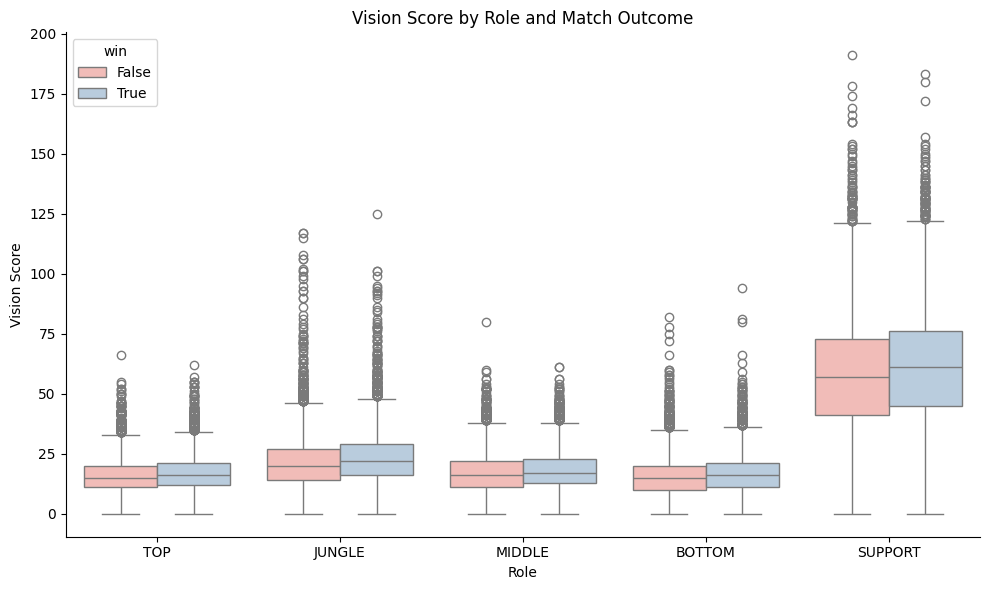

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=dataset,
    x="position",
    y="vision_score",
    hue="win",
    palette='Pastel1',

)

plt.title("Vision Score by Role and Match Outcome")
plt.xlabel("Role")
plt.ylabel("Vision Score")

sns.despine()
plt.tight_layout()
plt.show()


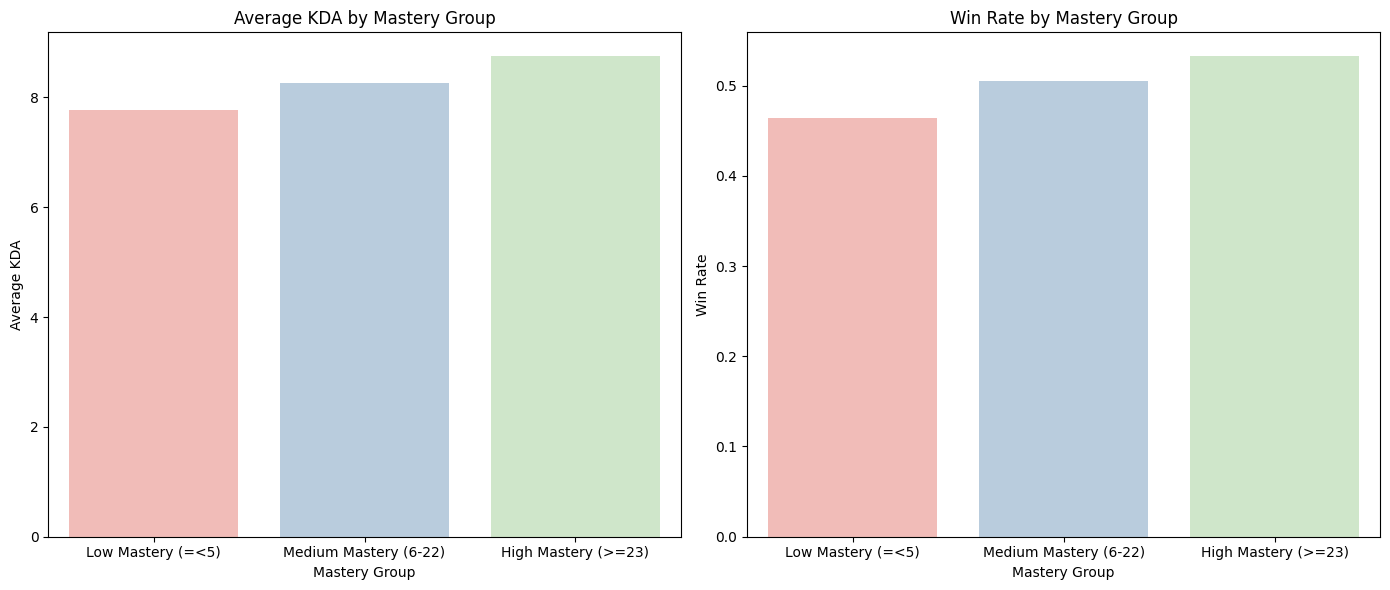

In [12]:
mastery_level_bins = [-float('inf'), 5, 22, float('inf')]
mastery_level_labels = ['Low Mastery (=<5)', 'Medium Mastery (6-22)', 'High Mastery (>=23)']

dataset['mastery_group'] = pd.cut(dataset['mastery_level'], bins=mastery_level_bins, labels=mastery_level_labels)

dataset['deaths_adjusted'] = dataset['deaths'].replace(0, 1)
dataset['kda_ratio'] = dataset['kills'] + dataset['assists'] / dataset['deaths_adjusted']

performance_by_mastery = (
    dataset.dropna(subset=['mastery_group'])
      .groupby('mastery_group', observed=True)
      .agg( avg_kda=('kda_ratio', 'mean'), avg_gold=('gold_earned', 'mean'), win_rate=('win', 'mean'))
      .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=performance_by_mastery,
    x='mastery_group',
    y='avg_kda',
    hue='mastery_group',
    palette='Pastel1',
    ax=axes[0]
)
axes[0].set_title('Average KDA by Mastery Group')
axes[0].set_xlabel('Mastery Group')
axes[0].set_ylabel('Average KDA')


sns.barplot(
    data=performance_by_mastery,
    x='mastery_group',
    y='win_rate',
    hue='mastery_group',
    palette='Pastel1',
    ax=axes[1]
)
axes[1].set_title('Win Rate by Mastery Group')
axes[1].set_xlabel('Mastery Group')
axes[1].set_ylabel('Win Rate')


plt.tight_layout()
plt.show()


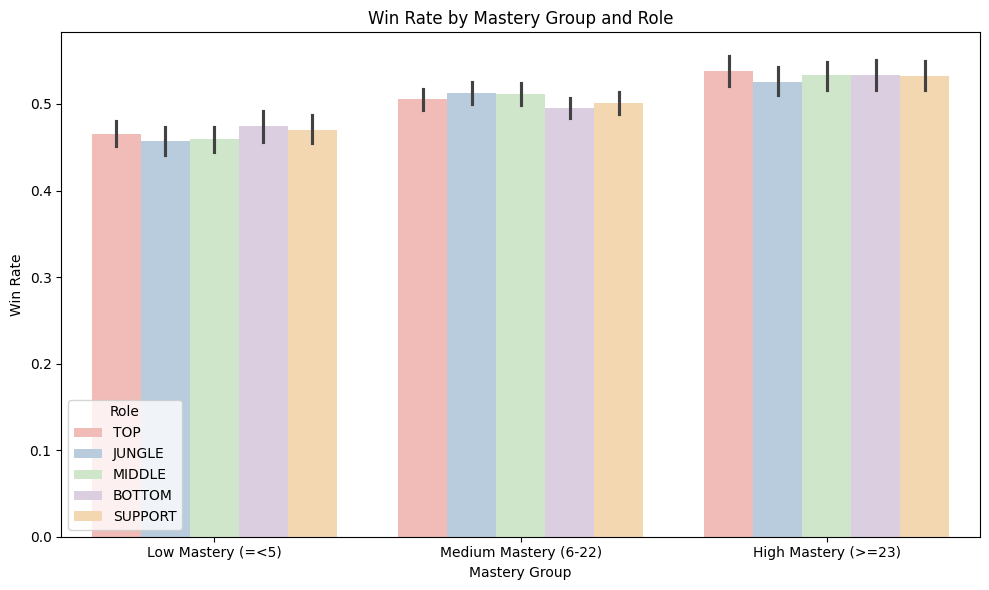

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=dataset,
    x="mastery_group",
    y="win",
    hue="position",
    palette="Pastel1",
    ax=ax
)

ax.set_title("Win Rate by Mastery Group and Role")
ax.set_xlabel("Mastery Group")
ax.set_ylabel("Win Rate")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


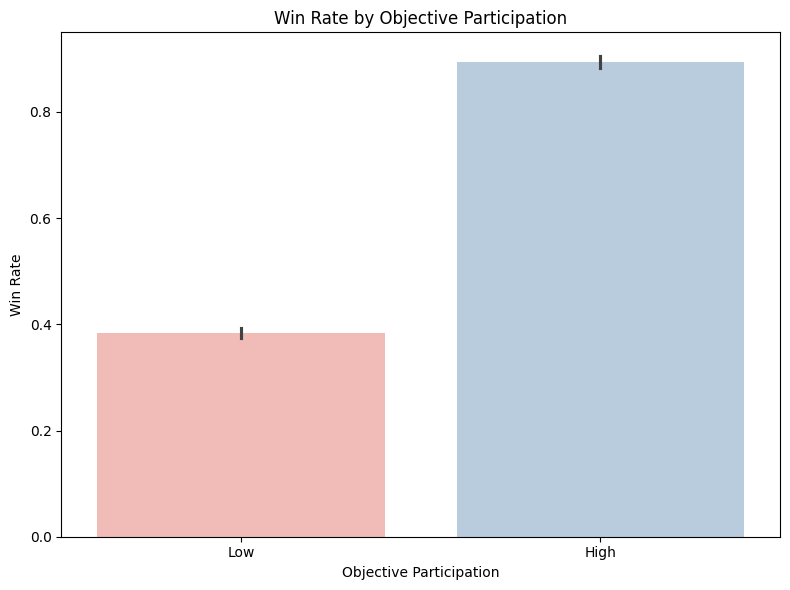

In [14]:
jungle_data = dataset[dataset['position'] == 'JUNGLE'][['team_baronKills', 'team_dragonKills', 'win', 'gold_earned', 'kda_ratio']]

median_baron = jungle_data['team_baronKills'].median()
median_dragon = jungle_data['team_dragonKills'].median()

def categorize_baron(value):
    if value <= median_baron:
        return 'Low'
    else:
        return 'High'

def categorize_dragon(value):
    if value <= median_dragon:
        return 'Low'
    else:
        return 'High'

jungle_data['baron_participation'] = jungle_data['team_baronKills'].apply(categorize_baron)

jungle_data['dragon_participation'] = jungle_data['team_dragonKills'].apply(categorize_dragon)

def categorize_obj(row):
  if row['baron_participation'] == 'High' and row['dragon_participation'] == 'High':
    return 'High'
  else:
    return 'Low'

jungle_data['obj_participation'] = jungle_data.apply(categorize_obj, axis=1)

objective_win_rates = jungle_data.groupby('obj_participation', observed=True).agg(
    game_count=('win', 'count'),
    win_rate=('win', 'mean')
).reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=jungle_data,
    x='obj_participation',
    y='win',
    hue='obj_participation',
    palette='Pastel1',
    dodge=False
)

ax.set_title("Win Rate by Objective Participation")
ax.set_xlabel("Objective Participation")
ax.set_ylabel("Win Rate")

plt.tight_layout()
plt.show()

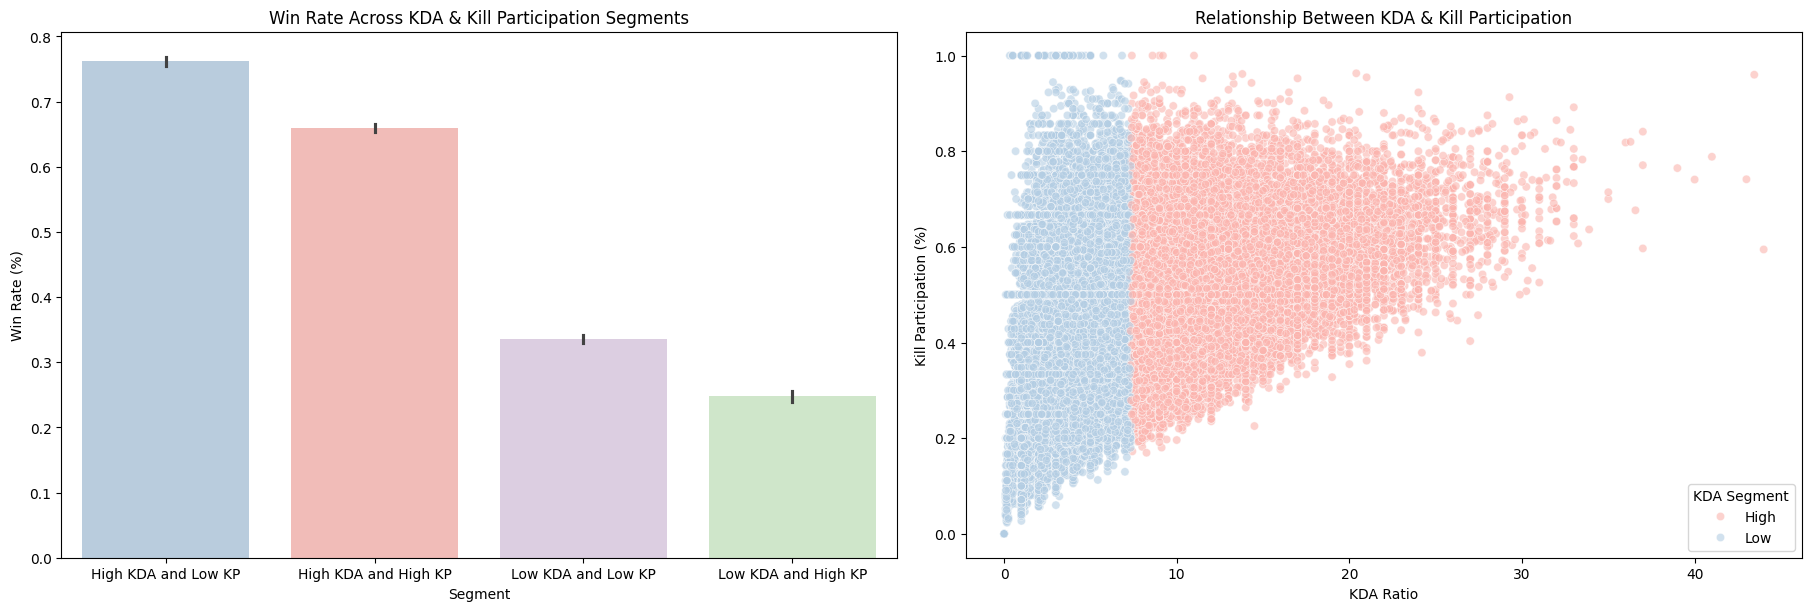

In [15]:
roles = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT']
lane_data = dataset[dataset['position'].isin(roles)][['position', 'kills', 'deaths', 'assists','gold_earned', 'damage_to_champ', 'win', 'kill_participation']]

lane_data['deaths_adjusted'] = lane_data['deaths'].replace(0, 1)
lane_data['kda_ratio'] = lane_data['kills'] + lane_data['assists'] / lane_data['deaths_adjusted']

median_kda = lane_data['kda_ratio'].median()
median_kp = lane_data['kill_participation'].median()

def categorize_kda(value):
    if value <= median_kda:
        return 'Low'
    else:
        return 'High'

def categorize_kp(value):
    if value <= median_kp:
        return 'Low'
    else:
        return 'High'

lane_data['kda_segment'] = lane_data['kda_ratio'].apply(categorize_kda)
lane_data['kp_segment'] = lane_data['kill_participation'].apply(categorize_kp)

def categorize_kills(row):
    if row['kda_segment'] == 'High' and row['kp_segment'] == 'High':
        return 'High KDA and High KP'
    elif row['kda_segment'] == 'High' and row['kp_segment'] == 'Low':
        return 'High KDA and Low KP'
    elif row['kda_segment'] == 'Low' and row['kp_segment'] == 'High':
        return 'Low KDA and High KP'
    else:
        return 'Low KDA and Low KP'

lane_data['kda_kp_segment'] = lane_data.apply(categorize_kills, axis=1)

kill_win_rates = lane_data.groupby('kda_kp_segment', observed=True).agg(
    game_count=('win', 'count'),
    win_rate=('win', 'mean')
).reset_index()
kill_win_rates['win_rate'] *= 100


fig, axes = plt.subplots(
    1, 2,
    figsize=(18, 6),
    constrained_layout=True
)

order = ['High KDA and Low KP', 'High KDA and High KP', 'Low KDA and Low KP',  'Low KDA and High KP'
]
sns.barplot(
    data=lane_data,
    x='kda_kp_segment',
    y='win',
    hue='kda_kp_segment',
    palette='Pastel1',
    order=order,
    ax=axes[0]
)
axes[0].set_title("Win Rate Across KDA & Kill Participation Segments")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Win Rate (%)")


sns.scatterplot(
    data=lane_data,
    x='kda_ratio',
    y='kill_participation',
    hue='kda_segment',
    palette='Pastel1',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Relationship Between KDA & Kill Participation")
axes[1].set_xlabel("KDA Ratio")
axes[1].set_ylabel("Kill Participation (%)")
axes[1].legend(title="KDA Segment")

plt.show()

## Splitting the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop('win', axis=1)
y = dataset['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 47807
Testing set size: 20490


## Encoding the positions

In [17]:
X_train = pd.get_dummies(X_train, columns=['position', 'mastery_group'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['position', 'mastery_group'], drop_first=True)


## Scaling the attributes

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the models

Logistic regression, random forests, and KNN were chosen to be used in the ensemble model because of how different they are from each other. I believe this will give diversity that will lower bias and give a better variance.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

lr_y_pred = lr.predict(X_test_scaled)
rf_y_pred = rf.predict(X_test_scaled)
knn_y_pred = knn.predict(X_test_scaled)



## Creating the ensemble model

Voting classifier model was used because of my previous experience with it, however I used soft voting this time. Hard voting gave low prediction rates and so changing that should give better predictions.

In [20]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('knn', knn)],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)

ensemble_y_pred = ensemble.predict(X_test_scaled)

## Analyzing the results

### Accuracy Score

In [21]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
ensemble_accuracy = accuracy_score(y_test, ensemble_y_pred)

print("Logistic Regression Accuracy:", lr_accuracy, "\n")
print("Random Forest Accuracy:", rf_accuracy, "\n")
print("K-Nearest Neighbors Accuracy:", knn_accuracy, "\n")
print("Ensemble Accuracy:", ensemble_accuracy, "\n")

Logistic Regression Accuracy: 0.9602244997559786 

Random Forest Accuracy: 0.9596388482186432 

K-Nearest Neighbors Accuracy: 0.9387994143484627 

Ensemble Accuracy: 0.9613958028306491 



### Classification report

{'False': {'precision': 0.9682052297939778, 'recall': 0.954123962908736, 'f1-score': 0.9611130229585566, 'support': 10245.0}, 'True': {'precision': 0.9547816047719838, 'recall': 0.9686676427525622, 'f1-score': 0.9616744997335143, 'support': 10245.0}, 'accuracy': 0.9613958028306491, 'macro avg': {'precision': 0.9614934172829808, 'recall': 0.9613958028306491, 'f1-score': 0.9613937613460355, 'support': 20490.0}, 'weighted avg': {'precision': 0.961493417282981, 'recall': 0.9613958028306491, 'f1-score': 0.9613937613460354, 'support': 20490.0}}




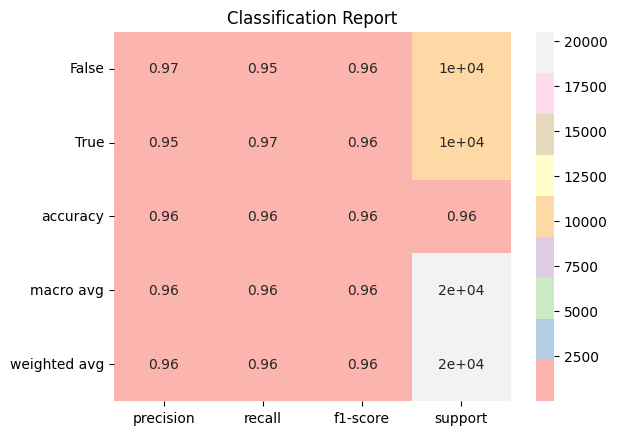

In [22]:
from sklearn.metrics import classification_report

ensemble_report = classification_report(y_test, ensemble_y_pred, output_dict=True)

print(ensemble_report)
print("\n")

ensemble_df = pd.DataFrame(ensemble_report).transpose()

sns.heatmap(ensemble_df, annot=True, cmap='Pastel1')
plt.title("Classification Report")
plt.show()

### Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

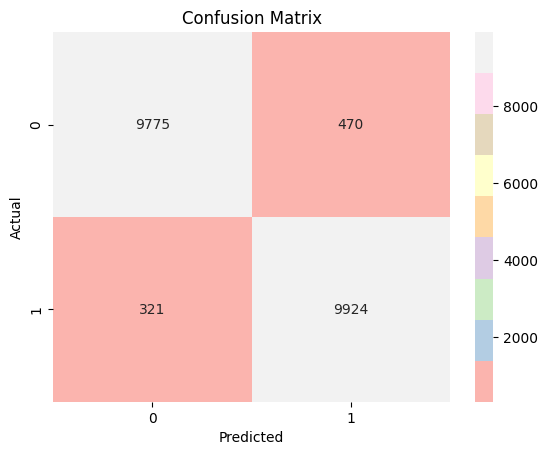

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, ensemble_y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Feature Importance

Gini impurity, permutation, and coefficients and odds ratio were used for feature importance. I believe these are all default methods that are reliable for these purposes, and I chose to use multiple to see if the results would be different from each other.

#### Random Forest: Gini Impurity

In [24]:
importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


#### Random Forest: Permutation

In [25]:
from math import perm
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

perm_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

perm_imp_df = perm_imp_df.sort_values(by='Importance', ascending=False)


#### Logistic Regression: Coefficients and Odds Ratio

In [26]:
import numpy as np

coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

feature_coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

feature_coefficients_df = feature_coefficients_df.sort_values(by='Odds Ratio', ascending=False)

#### Logistic Regression: Permutation

In [27]:
log_result = permutation_importance(lr, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

log_perm_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_result.importances_mean
})

log_perm_imp_df = log_perm_imp_df.sort_values(by='Importance', ascending=False)

#### Visualizations

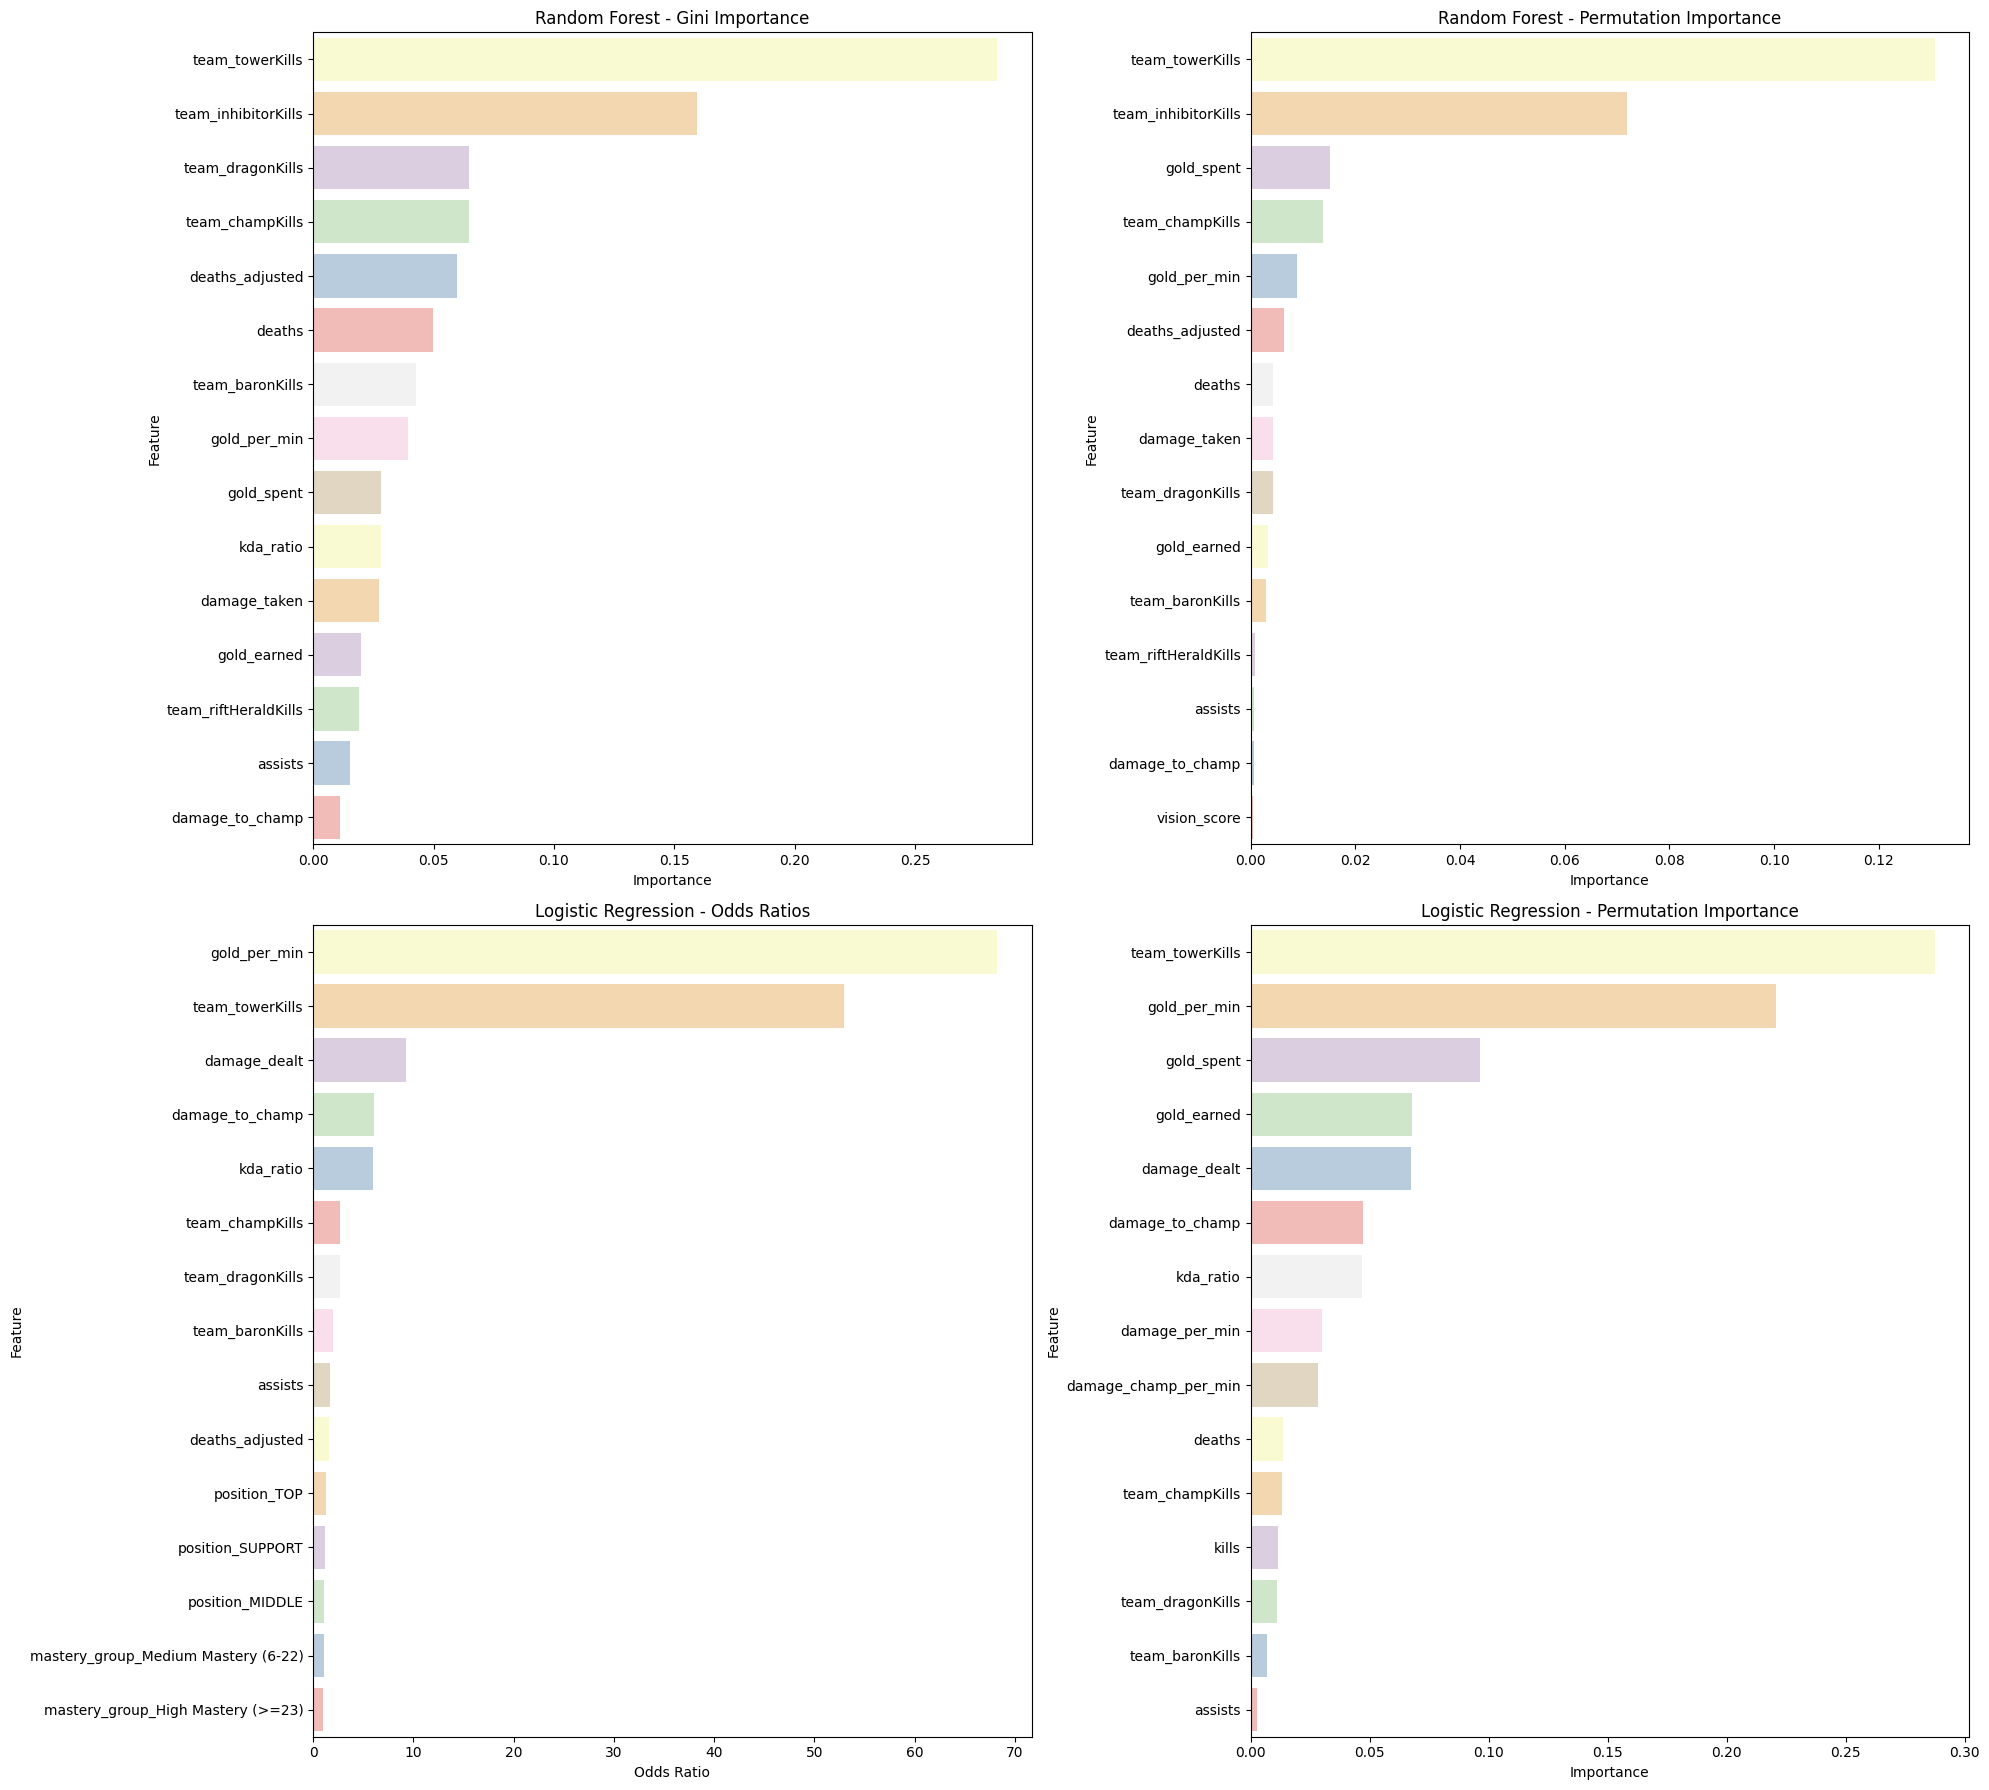

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))
plt.subplots_adjust(hspace=0.3)

# 1. RF Gini Importance
sns.barplot(
    ax=axes[0, 0],
    data=feature_importances_df.head(15),
    x='Importance',
    y='Feature',
    hue='Importance',
    legend=False,
    palette='Pastel1'
)
axes[0, 0].set_title("Random Forest - Gini Importance")
axes[0, 0].set_xlabel("Importance")

# 2. RF Permutation Importance
sns.barplot(
    ax=axes[0, 1],
    data=perm_imp_df.head(15),
    x='Importance',
    y='Feature',
    hue='Importance',
    legend=False,
    palette='Pastel1'
)
axes[0, 1].set_title("Random Forest - Permutation Importance")
axes[0, 1].set_xlabel("Importance")

# 3. LR Coefficients
sns.barplot(
    ax=axes[1, 0],
    data=feature_coefficients_df.head(15),
    x='Odds Ratio',
    y='Feature',
    hue='Odds Ratio',
    legend=False,
    palette='Pastel1'
)
axes[1, 0].set_title("Logistic Regression - Odds Ratios")
axes[1, 0].set_xlabel("Odds Ratio")

# 4. LR Permutation Importance
sns.barplot(
    ax=axes[1, 1],
    data=log_perm_imp_df.head(15),
    x='Importance',
    y='Feature',
    hue='Importance',
    legend=False,
    palette='Pastel1'
)
axes[1, 1].set_title("Logistic Regression - Permutation Importance")
axes[1, 1].set_xlabel("Importance")

plt.tight_layout()
plt.show()


## Drawing conclusions

### Is it possible to predict a League of Legends match given the end-game statistics?

##### Yes! The learning models used in this project all had 94%+ accuracy scores and the final ensemble model had a 96% score.

### What features mattered the most?

##### After using two different feature importance methods on the random forest and logistic regression (multiple sources informed that KNN does not really use this), some of the features that consistently appeared at the top of each visualization are 1) team tower kills, 2) gold per minute, 3) team champion kills, 4) deaths, and 5) damage to champions.

I was surprised to find that some of the features that I thought were important were not even close to the top, however these results do make sense.

-------
1) The way to win the game is to destroy the enemy Nexus, and in order to expose the Nexus, you must **destroy the towers as a team**.

2) **Gold** allows players to purchase items, which enhance the characters' stats and abilities, so more gold means more items, which means more damage.

3) **Killing the enemy** gives time to push and destroy towers because no one is around to stop you, which lets you reach the Nexus.

4) I'm assuming **deaths** is at the top for the same reason, but reversed. The more you die, the more the enemy can push towers. The less you die, the more you can defend the towers to prevent the enemy from winning.

5) **Damaging champions** is important because that is how you kill them, which is related to the previous points.

### What further steps can be taken with this topic?

##### Next it would be good to see if it is possible to determine a victory with the same attributes of data of the first ten minutes of the match. So "if this is the KDA ratio, gold earned, etc. of the player at the ten minute mark, did they win or lose this match?"